## Random Forest
- vs Decision Tree
 - DT 는 빠르다
 - DT 는 훈련데이터에 과대적합 되는 경향이 있다
 - 서로 다른 과대적합된 경우가 많아서  
   

- 부트스트랩 샘플
 - 개별트리들이 랜덤하게 서러 독립적
 - 무작위 중복추출을 통해 전체 데이터 수만큼 임의샘플
 
- cf)
 - a=[1,2,3,4]
 - bootstrap_sampling: a1=[1,1,3,4],a2=[3,2,1,1,],a3=[2,4,4,3]...
 
 
### 결정사항
- n_estimator: 생성할 트리 개수
- max_features: 분류를 위한 특성개수

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [9]:
# 1. make toy data
# 초승달 모양의 비선형적 데이터를 만들어줌
# noise 없으면 완전 초승달 모양으로 나옴
X,y = datasets.make_moons(n_samples = 100,noise= 0.25,random_state=1)
X.shape

(100, 2)

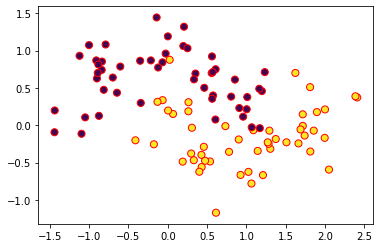

In [6]:
plt.scatter(X[:,0],X[:,1], edgecolors='red',s=50,c=y)

In [73]:
# 1.2 데이터 분할
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1001)

In [12]:
# 2. RF modeling
RF = RandomForestClassifier(n_estimators=5,random_state=1)
RF.fit(X_train,y_train)  # max_features='auto'(sqrt(n))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=5,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [15]:
RF.score(X_train,y_train),RF.score(X_test,y_test)

(0.9625, 0.95)

In [13]:
RF.estimators_

[DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=1791095845, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort=False,
                        random_state=2135392491, splitter='best'),
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                        max_features='auto', max_leaf_nodes=None,
                 

In [16]:
from sklearn.tree import export_graphviz
import graphviz

In [17]:
export_graphviz(RF.estimators_[0], out_file='rf0.dot', rounded=True, proportion=False, filled=True, precision=2)

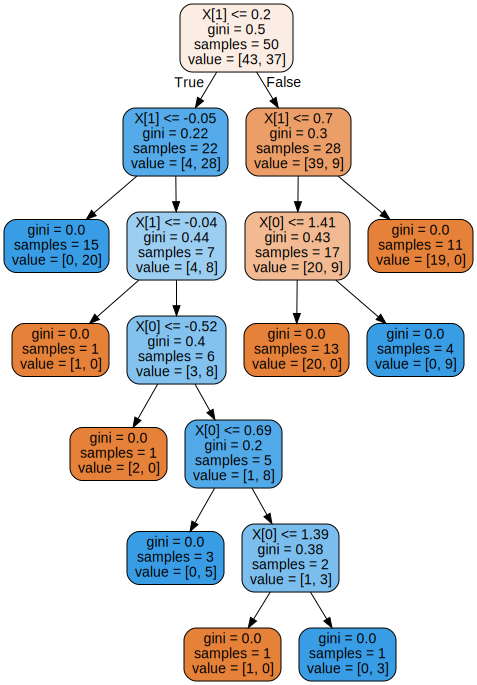

In [18]:
with open("rf0.dot") as f:
    a = f.read()
graphviz.Source(a)

In [74]:
# 1. 데이터 불러오기
iris_data = datasets.load_iris()

X = iris_data['data']
y = iris_data['target']

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=1001)

In [75]:
# 2. modeling
RF_iris = RandomForestClassifier(n_estimators=10)
RF_iris.fit(X_train,y_train)
'{:.3f},{:.3f}'.format(RF_iris.score(X_train,y_train),RF_iris.score(X_test,y_test))


'1.000,0.974'

In [86]:
train_acc=[]
test_acc=[]
n_estimators = range(1,201,5)

for n_estimator in n_estimators:
    RF = RandomForestClassifier(n_estimators=n_estimator)
    RF.fit(X_train,y_train)
    
    train_acc.append(RF.score(X_train,y_train))
    test_acc.append(RF.score(X_test,y_test))

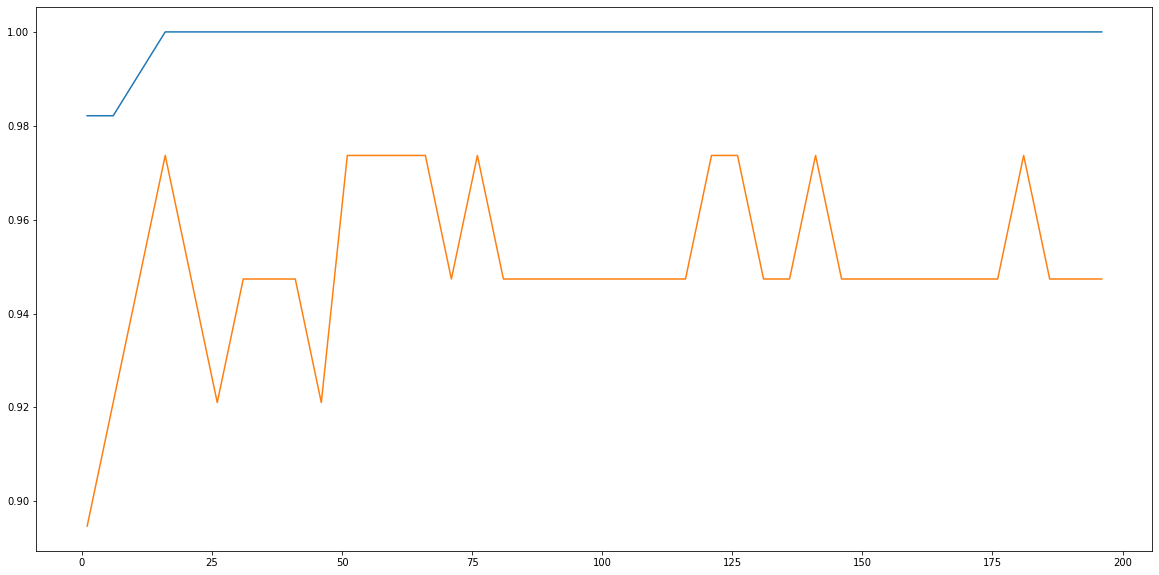

In [87]:
plt.figure(figsize=(20,10))
plt.plot(n_estimators,train_acc)
plt.plot(n_estimators,test_acc)

In [88]:
# 변수 중요도
RF_iris.feature_importances_

array([0.10067952, 0.04499078, 0.49649511, 0.3578346 ])